In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

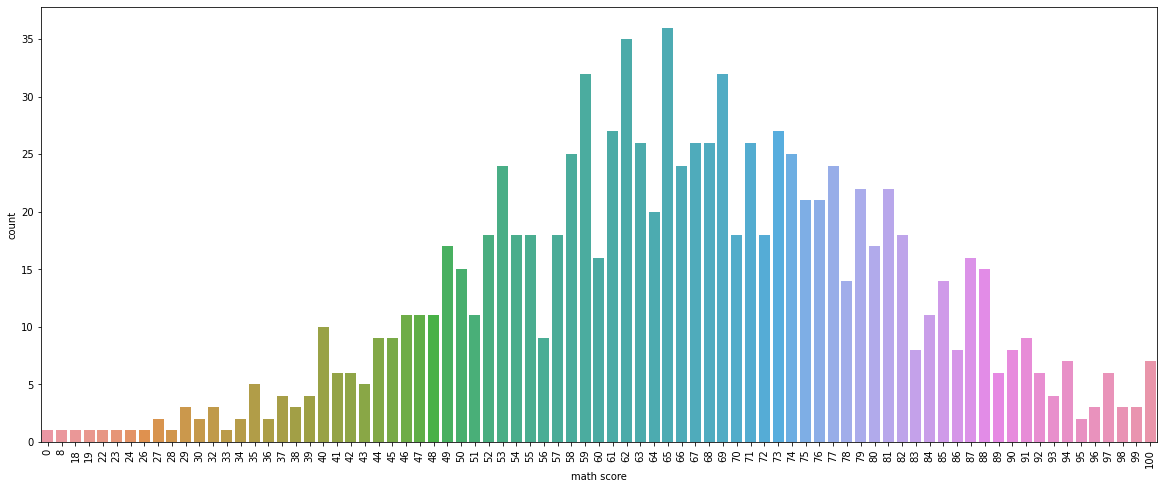

In [9]:
plt.figure(figsize = (20,8))
m = sns.countplot(x='math score', data = df)
n = plt.setp(m.get_xticklabels(),rotation=90)

In [10]:
pass_mark = 40

In [11]:
df['math_pass_status'] = np.where(df['math score'] < pass_mark, 'F', 'P')
df['math_pass_status'].value_counts()

P    960
F     40
Name: math_pass_status, dtype: int64

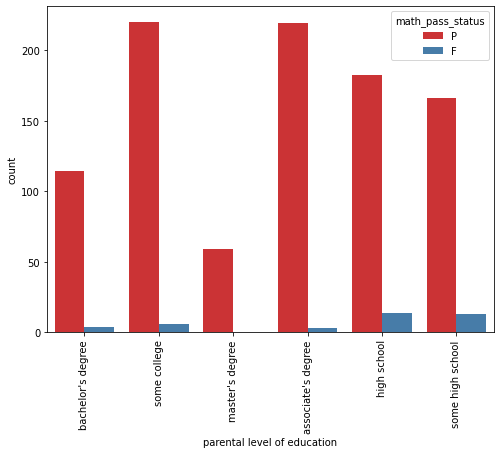

In [12]:
plt.figure(figsize=(8,6))
p = sns.countplot(x='parental level of education', data = df, hue = 'math_pass_status', palette='Set1')
q = plt.setp(p.get_xticklabels(), rotation =90)


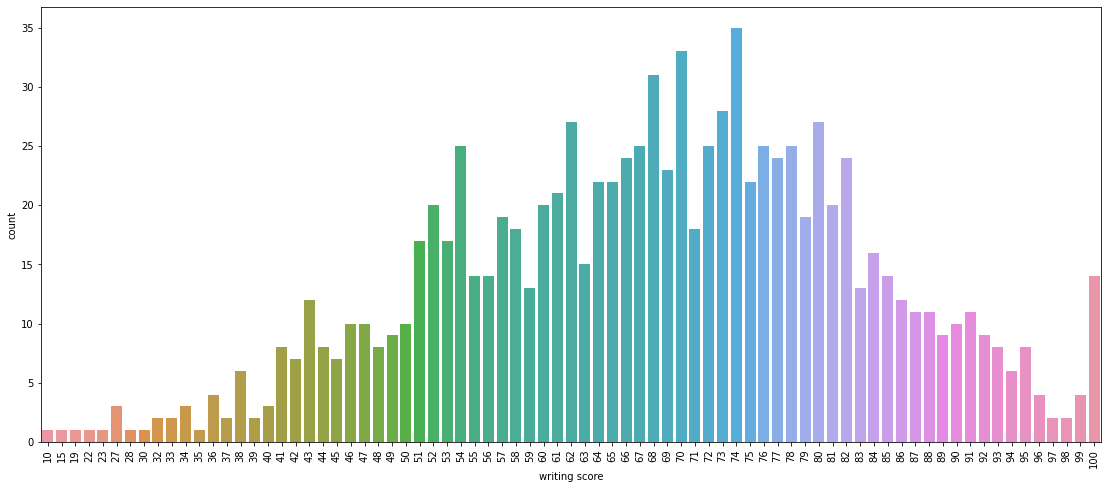

In [14]:
plt.figure(figsize=(20,8))
w = sns.countplot(x = 'writing score', data = df)
_ = plt.setp(w.get_xticklabels(), rotation = 90)

In [15]:
df['writing_pass_status'] = np.where(df['writing score'] < pass_mark, 'F', 'P')
df['writing_pass_status'].value_counts()

P    968
F     32
Name: writing_pass_status, dtype: int64

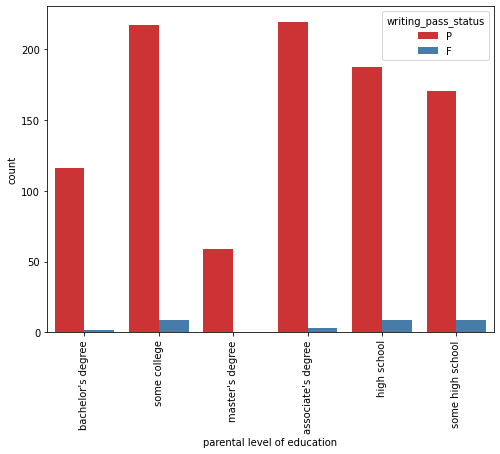

In [16]:
plt.figure(figsize=(8,6))
p = sns.countplot(x='parental level of education', data = df, hue = 'writing_pass_status', palette='Set1')
q = plt.setp(p.get_xticklabels(), rotation =90)

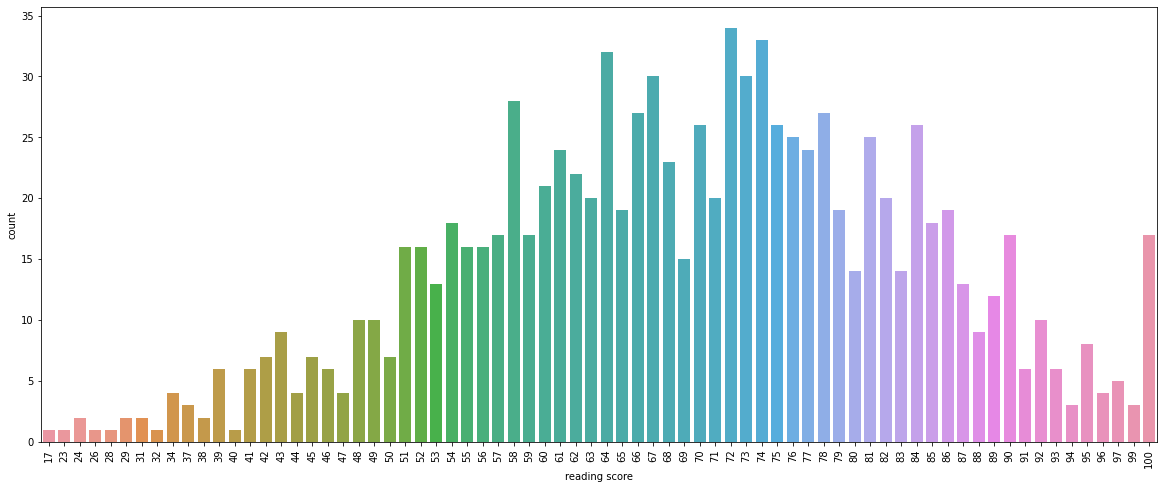

In [18]:
plt.figure(figsize=(20,8))
w = sns.countplot(x = 'reading score', data = df)
_ = plt.setp(w.get_xticklabels(), rotation = 90)

In [19]:
df['reading_pass_status'] = np.where(df['reading score'] < pass_mark, 'F', 'P')
df['reading_pass_status'].value_counts()

P    974
F     26
Name: reading_pass_status, dtype: int64

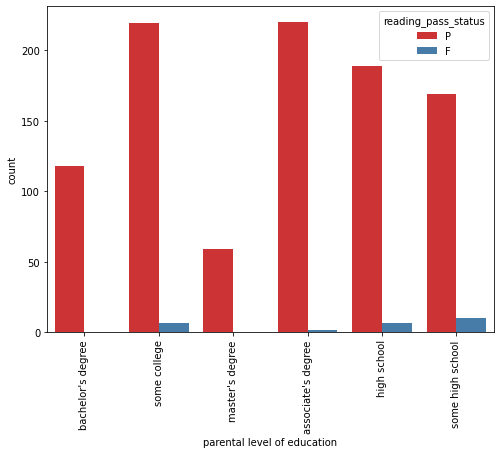

In [20]:
plt.figure(figsize=(8,6))
p = sns.countplot(x='parental level of education', data = df, hue = 'reading_pass_status', palette='Set1')
q = plt.setp(p.get_xticklabels(), rotation =90)

In [21]:
df['overall_pass_status'] = df.apply(lambda x: 'F' if x['math_pass_status']=='F' or x['reading_pass_status']=='F' or 
                                    x['writing_pass_status']=='F' else 'T', axis = 1)
df['overall_pass_status'].value_counts()

T    949
F     51
Name: overall_pass_status, dtype: int64

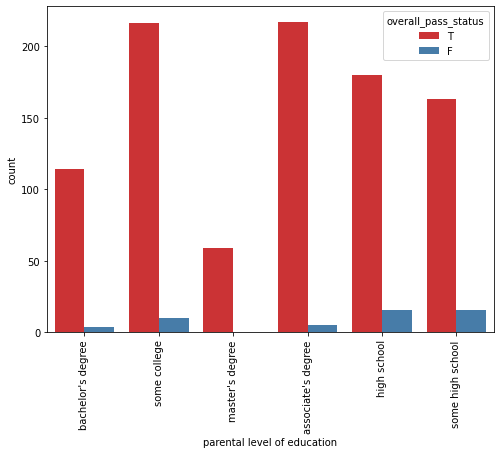

In [22]:
plt.figure(figsize=(8,6))
p = sns.countplot(x='parental level of education', data = df, hue = 'overall_pass_status', palette='Set1')
q = plt.setp(p.get_xticklabels(), rotation =90)

In [23]:
df['total_marks'] = df['math score'] + df['reading score'] + df['writing score']

In [24]:
df['%age'] = round(df['total_marks']/3,2)

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_pass_status,writing_pass_status,reading_pass_status,overall_pass_status,total_marks,%age
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,T,218,72.67
1,female,group C,some college,standard,completed,69,90,88,P,P,P,T,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,T,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,T,148,49.33
4,male,group C,some college,standard,none,76,78,75,P,P,P,T,229,76.33


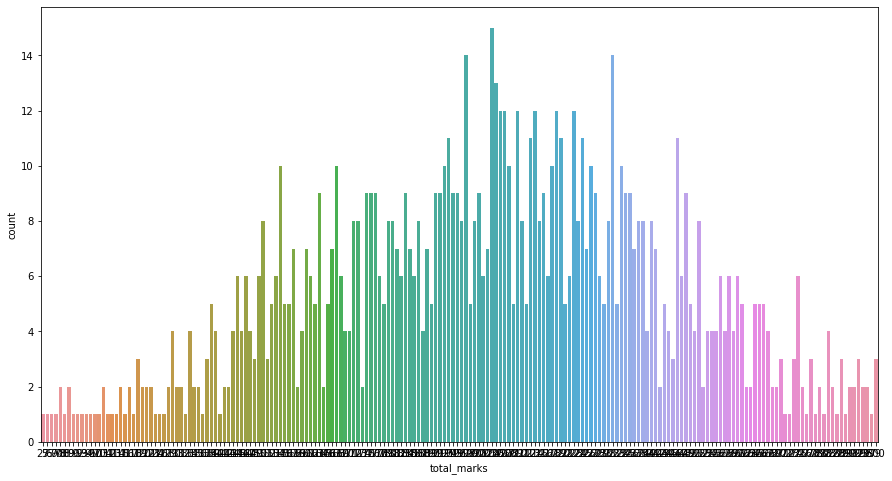

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x='total_marks', data = df)

In [29]:
def getGrade(percentage, overall_pass_status):
    if ( overall_pass_status == 'F'):
        return 'F'    
    if ( percentage >= 80 ):
        return 'A'
    if ( percentage >= 70):
        return 'B'
    if ( percentage >= 60):
        return 'C'
    if ( percentage >= 50):
        return 'D'
    if ( percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : getGrade(x['%age'], x['overall_pass_status']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

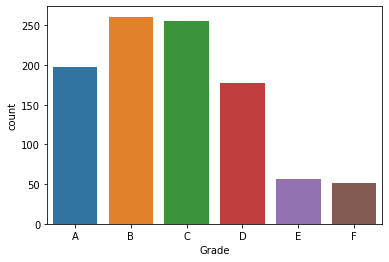

In [30]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'])

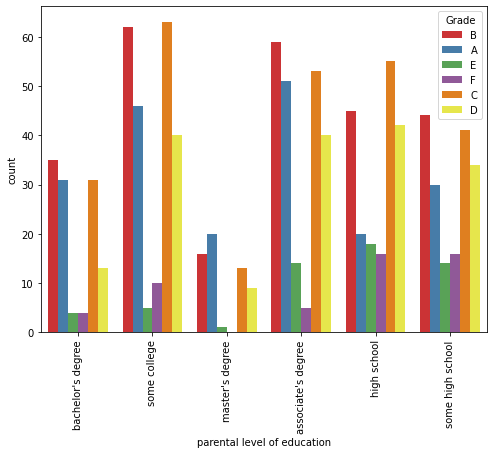

In [31]:
plt.figure(figsize=(8,6))
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='Set1')
_ = plt.setp(p.get_xticklabels(), rotation=90)